In [2]:
import sys
sys.path.append("..\\methods")

In [4]:
from estnltk import Text

import json
from estnltk.converters import json_to_text

from noun_phrase_extraction import create_df
from POS_sequence import get_POS_sequence
from graph_methods import *

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

import pandas as pd
import numpy as np

In [2]:
with open('test_text.json', 'r') as f:
    content = json.load( f )

In [3]:
test_text = json_to_text( content )

In [4]:
test_text

Text(text='RAIVO PALMARU , “ Sõnumileht ”\n\nRublatehing oli seotud kütuse salakaubandusega .\nSellisele järeldusele jõudsid naftaäri kriminaalasja uurimise käigus Läti juurdlusorganid .\nRootsis registreeritud firma sildi all tegutsenud grupp tellis Eestis rahareformi ajal kokku korjatud rublade veoks lennukid ja vähemalt 500 miljoni rubla müügi korraldas selle grupiga seotud Eesti ärimees .\nSaadud raha on varjul Küprose pangas .\n\nPank lõhkise küna ees\n\nEesti Panga ( EP ) andmetel vahetati rahareformi käigus kroonide vastu  2 259 669 091  rubla .\nLisaks sellele oli panga varahoidlates veel  4 396 739  rubla .\n\nRahareformi esimesel päeval , 20. juunil 1992 , sõlmisid Eesti Vabariigi valitsus ja Vene Föderatsiooni valitsus omavahelise kokkuleppe vastastikustest kohustustest seoses Eesti Vabariigi rahvusliku valuuta käibelevõtmisega .\nSellele kirjutasid alla Eesti peaminister Tiit Vähi ja Vene valitsuse aseesimees Aleksandr Sohhin .\n\nKokkuleppe 5. artikkel nägi ette , et Eesti pool annab kõik rahavahetuse käigus kokku kogutud rublad kuu aja jooksul üle Venemaa keskpangale .\nTäpsustamata jäid aga raha üleandmise tingimused .\n\nSee kokkulepe jäi täitmata nii Venemaa kui ka Eesti poolt .\nNõnda jäi umbes 70 tonni rublasid Eesti Panga varahoidlasse .\nKokkuleppele viidates nõudsid venelased raha tagasi , samas aga teatasid , et nad ei kanna vastutust Eesti Hoiupanga ( NSVLi Hoiupanga EVP ) hoiustajate ees .\nKa nende hoiuste kogusumma moodustas umbes kaks miljardit rubla ning EP oli sunnitud võtma vastavad garantiikohustused endale .\n\nBo Kragh soovitas rublad müüa\n\nEsimest korda arutas Eesti Panga nõukogu kujunenud olukorda 7. oktoobril 1992.\nVastavad kirjalikud ettepanekud esitas panga tollane asepresident Bo Kragh .\nTa leidis , et EP garantiikohustuste ulatuses tuleks teha tasaarvestus .\nÜhtlasi soovitas Kragh rublad müüa Eesti valuutaoksjonitel , anda Eesti Kütusele rublakrediiti naftatoodete ostmiseks või anda osa rublasid remigratsioonifondile .\n\nEP nõukogu aktsepteeris asepresidendi soovitusi ja tegi panga presidendile Siim Kallasele ülesandeks pidada rublade saatuse küsimuses nõu presidendi , Riigikogu esimehe , peaministri ja välisministriga .\n\n1992. aasta 28. oktoobril arutas Eesti Panga nõukogu asja veel kord ja otsustas , et kui läbirääkimised Moskvas külmutatud Eesti Vabariigi aktivate tagasisaamise üle ei anna 15. novembriks tulemusi , volitab panga nõukogu Siim Kallast teatama valitsusele panga valmisolekust kuulutada välja tasaarvestus .\n\nOma teeneid pakkusid Silvesja Apananski\n\nPärast seda nähti Siim Kallast sageli Toompeal .\n4. detsembril 1992 andis rahareformikomitee välja dekreedi nr. 40.\nSelles otsustati vabastada Eesti Panga ja kommertspankade hoidlad sularaharubladest , realiseerida rublad ja säilitada nende realiseerimisel konfidentsiaalsus .\nDekreedile kirjutas alla peaminister Mart Laar .\n\nSamal päeval kirjutasid peaminister ja Eesti Panga president alla protokollile , milles märgitakse : “ Eesti Pank ja Eesti Vabariigi valitsus leppisid kokku , et seoses ruumipuudusega Eesti Panga varahoidlates antakse rahareformi käigus elanikelt ja firmadelt kokku kogutud sularaharublad vastutavale hoiule Eesti Vabariigi valitsuse varahoidlatesse . ”\n\nTeatavasti ei ole valitsusel mingeid varahoidlaid .\n\nPärast seda asus rublamüüki korraldama peaministri nõunik Tiit Pruuli .\nTõsi , mõningaid samme oli astutud juba enne 4. detsembri dekreeti .\n24. novembril käis peaministri jutul tuntud ärinaine Tiiu Silves , kellega räägiti rublade müügist ja lepiti kokku , et vajaduse korral võtab Silvesega ühendust Pruuli .\n\nTeist korda kohtus Pruuli Silvesega 7. detsembril 1992.\nKuid peaministri nõunikule Silves ei meeldinud ja ta väljendas seda ka valitsuse istungil .\n\nEnam-vähem samal ajal pakkus ennast vahendajaks Leonid Apananski .\nEnt temale vastati tollase standardfraasiga : rublad on alles ja vastavalt lepingule antakse need üle Vene poolele .\n\nPanus maagidele\n\nSeejärel asus Tiit P

In [5]:
for text_id, text in enumerate([test_text]):
    df = create_df(text_id, text)

In [6]:
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0
...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0


### POS-märgendite järjestused

Lisame kõik sõnaliigijärjestused DataFrame-i:

In [7]:
all_pos = []
for phrase in df['phrase']:
    all_pos.append(get_POS_sequence(phrase))
df.insert(len(df.columns), 'pos_sequence', all_pos)

In [8]:
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K
...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z


### Süntaksipuu graafi esitus

In [9]:
test_phrase = df['phrase'][4]

In [10]:
test_phrase.stanza_syntax

Layer(name='stanza_syntax', attributes=('id', 'lemma', 'upostag', 'xpostag', 'feats', 'head', 'deprel', 'deps', 'misc', 'parent_span', 'children'), spans=SL[Span('Rootsis', [{'id': 1, 'lemma': 'Rootsi', 'upostag': 'H', 'xpostag': 'H', 'feats': OrderedDict([('sg', 'sg'), ('in', 'in')]), 'head': 2, 'deprel': 'obl', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': ()}]),
Span('registreeritud', [{'id': 2, 'lemma': 'registreeritud', 'upostag': 'A', 'xpostag': 'A', 'feats': OrderedDict([('pl', 'pl'), ('n', 'n')]), 'head': 3, 'deprel': 'acl', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': <class 'tuple'>}]),
Span('firma', [{'id': 3, 'lemma': 'firma', 'upostag': 'S', 'xpostag': 'S', 'feats': OrderedDict([('sg', 'sg'), ('g', 'g')]), 'head': 4, 'deprel': 'nmod', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': <class 'tuple'>}]),
Span('sildi', [{'id': 4, 'lemma': 'silt', 'upostag': 'S', 'xpostag': 'S', 'feats': OrderedDict([('sg', 'sg'), ('g', 'g')]), 'head': 0, 'deprel': 'root', 'deps': '_', 'misc': '_', 'parent_span': None, 'children': <class 'tuple'>}]),
Span('all', [{'id': 5, 'lemma': 'all', 'upostag': 'K', 'xpostag': 'K', 'feats': OrderedDict(), 'head': 4, 'deprel': 'case', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': ()}])])

Graafi koostamisel on võetud eeskuju siit: https://github.com/estnltk/syntax_experiments/blob/subcat/obl_data_experiments/data_helpers/syntax_graph.py

In [11]:
test_graph = create_graph_with_all_attributes(test_phrase)

In [12]:
test_graph_with_ids = create_graph_with_ids(test_phrase)

In [13]:
test_graph_with_pos = create_graph_with_POS(test_phrase)

In [14]:
test_graph_with_ner_timex = create_graph_with_ner_timex(test_phrase)

In [15]:
test_graph.nodes(data=True)

NodeDataView({1: {'id': 1, 'lemma': 'Rootsi', 'pos': 'H', 'deprel': 'obl', 'form': 'Rootsis', 'feats': OrderedDict([('sg', 'sg'), ('in', 'in')]), 'start': 0, 'end': 7}, 2: {'id': 2, 'lemma': 'registreeritud', 'pos': 'A', 'deprel': 'acl', 'form': 'registreeritud', 'feats': OrderedDict([('pl', 'pl'), ('n', 'n')]), 'start': 8, 'end': 22}, 3: {'id': 3, 'lemma': 'firma', 'pos': 'S', 'deprel': 'nmod', 'form': 'firma', 'feats': OrderedDict([('sg', 'sg'), ('g', 'g')]), 'start': 23, 'end': 28}, 4: {'id': 4, 'lemma': 'silt', 'pos': 'S', 'deprel': 'root', 'form': 'sildi', 'feats': OrderedDict([('sg', 'sg'), ('g', 'g')]), 'start': 29, 'end': 34}, 0: {}, 5: {'id': 5, 'lemma': 'all', 'pos': 'K', 'deprel': 'case', 'form': 'all', 'feats': OrderedDict(), 'start': 35, 'end': 38}})

In [16]:
test_graph_with_ids.nodes(data=True)

NodeDataView({1: {'id': 1}, 2: {'id': 2}, 3: {'id': 3}, 4: {'id': 4}, 0: {}, 5: {'id': 5}})

In [17]:
test_graph_with_pos.nodes(data=True)

NodeDataView({1: {'id': 1, 'pos': 'H'}, 2: {'id': 2, 'pos': 'V|A'}, 3: {'id': 3, 'pos': 'S'}, 4: {'id': 4, 'pos': 'S'}, 0: {}, 5: {'id': 5, 'pos': 'K'}})

In [18]:
test_graph_with_ner_timex.nodes(data=True)

NodeDataView({1: {'id': 1, 'ner_timex': 'ner'}, 2: {'id': 2, 'ner_timex': None}, 3: {'id': 3, 'ner_timex': None}, 4: {'id': 4, 'ner_timex': None}, 0: {}, 5: {'id': 5, 'ner_timex': None}})

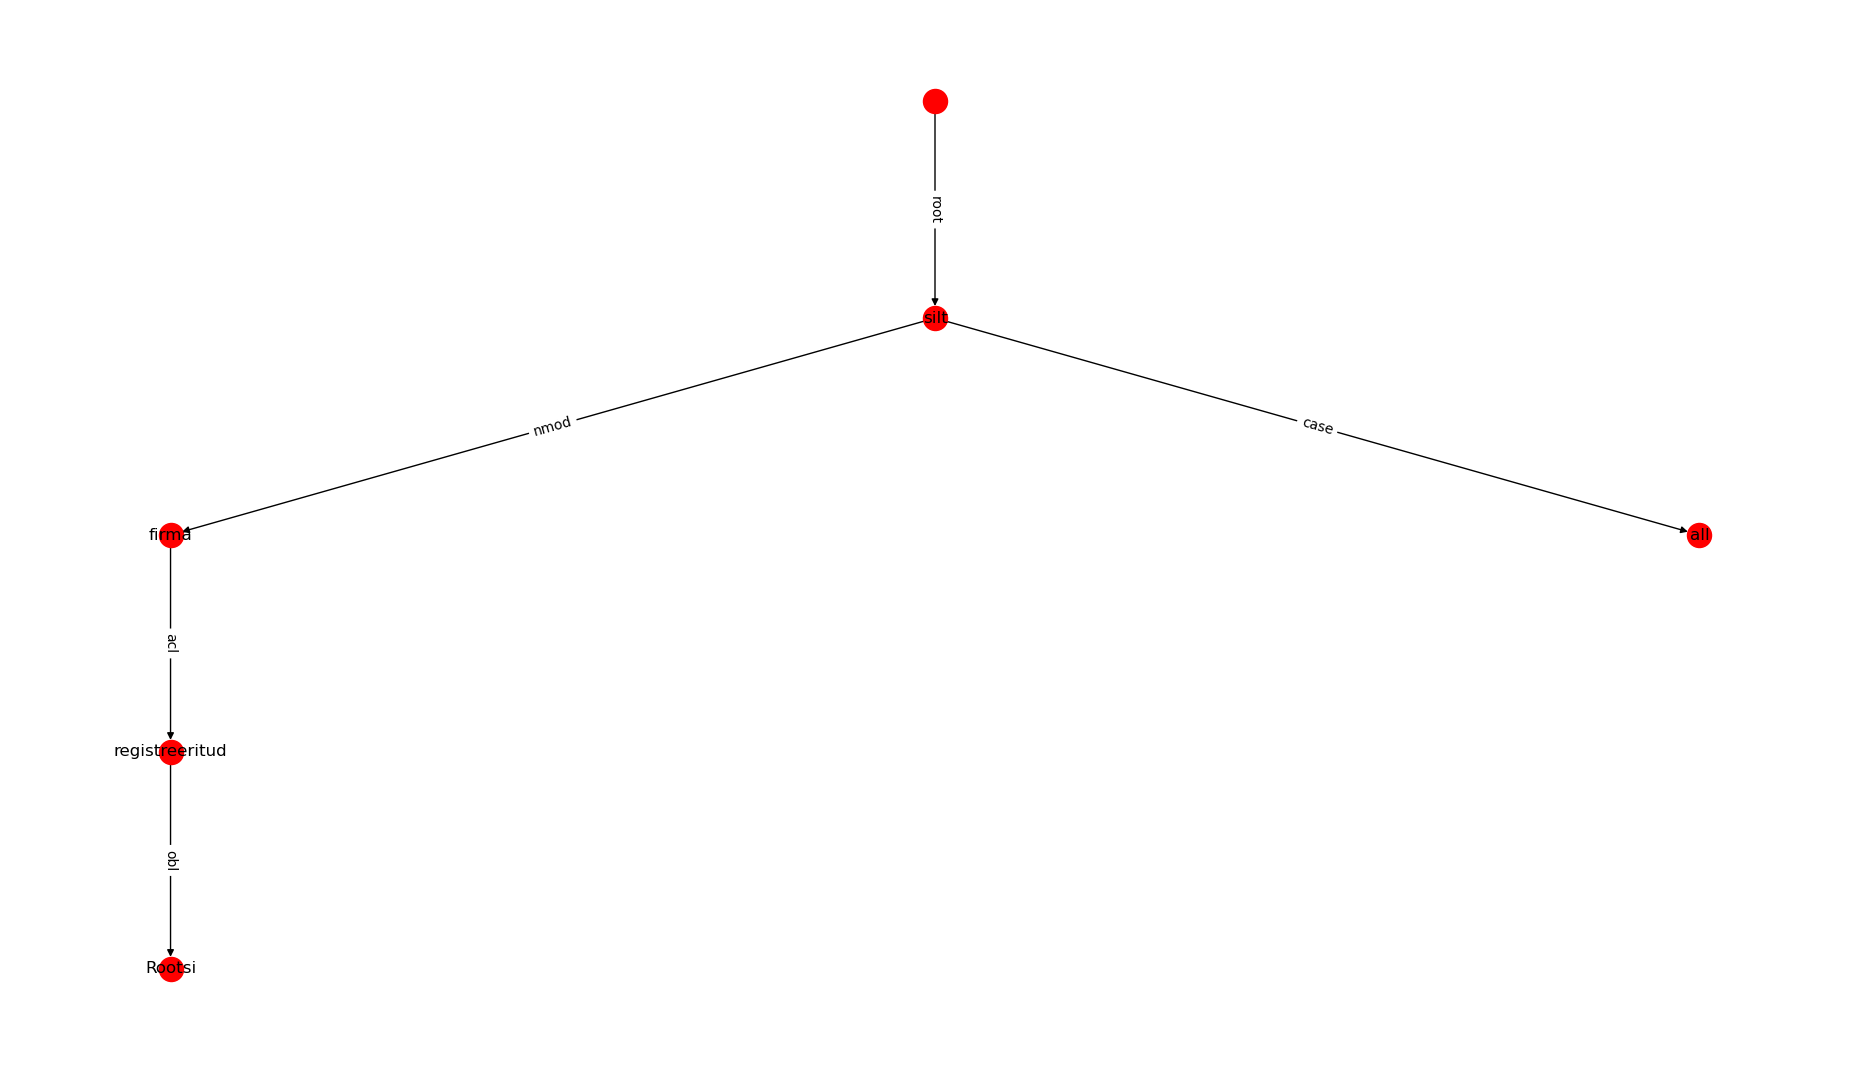

<Figure size 1850x1050 with 0 Axes>

In [19]:
# Visualiseerimine
draw_graph(test_graph, 'lemma')

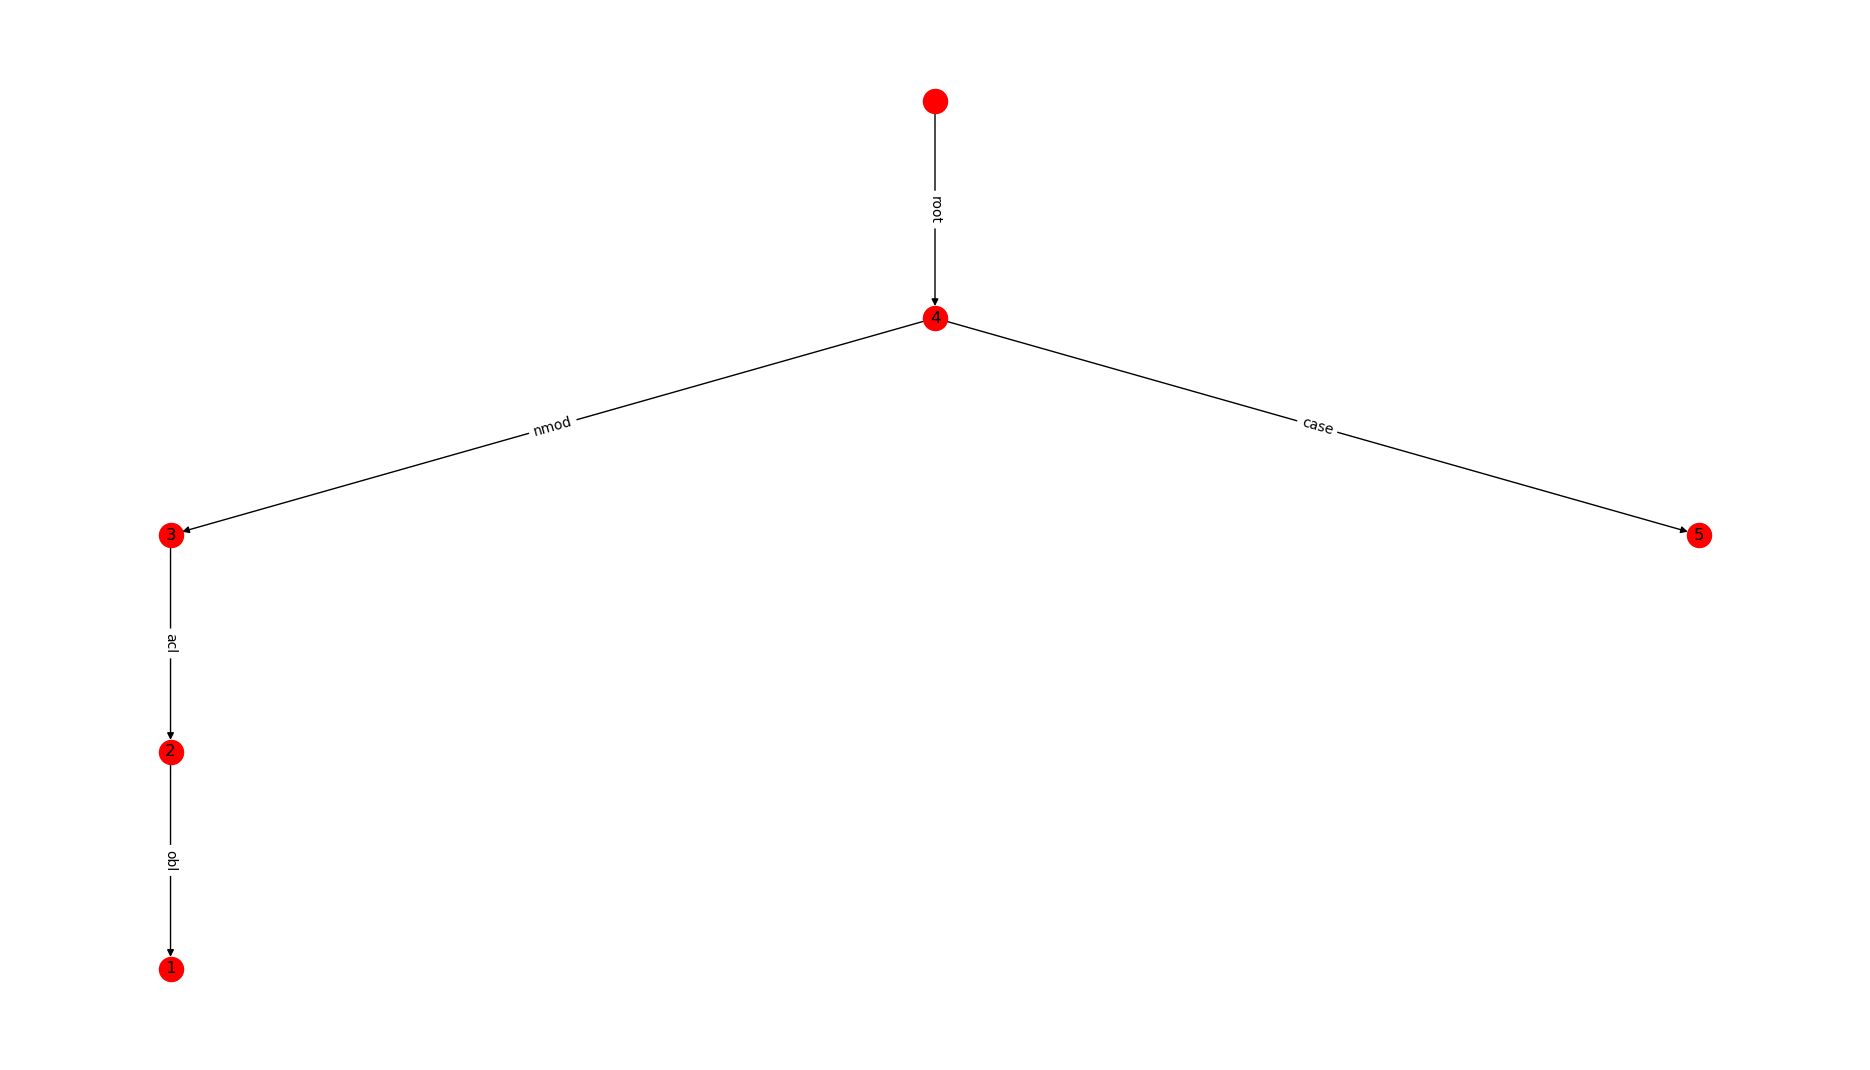

<Figure size 1850x1050 with 0 Axes>

In [20]:
draw_graph(test_graph_with_ids, 'id')

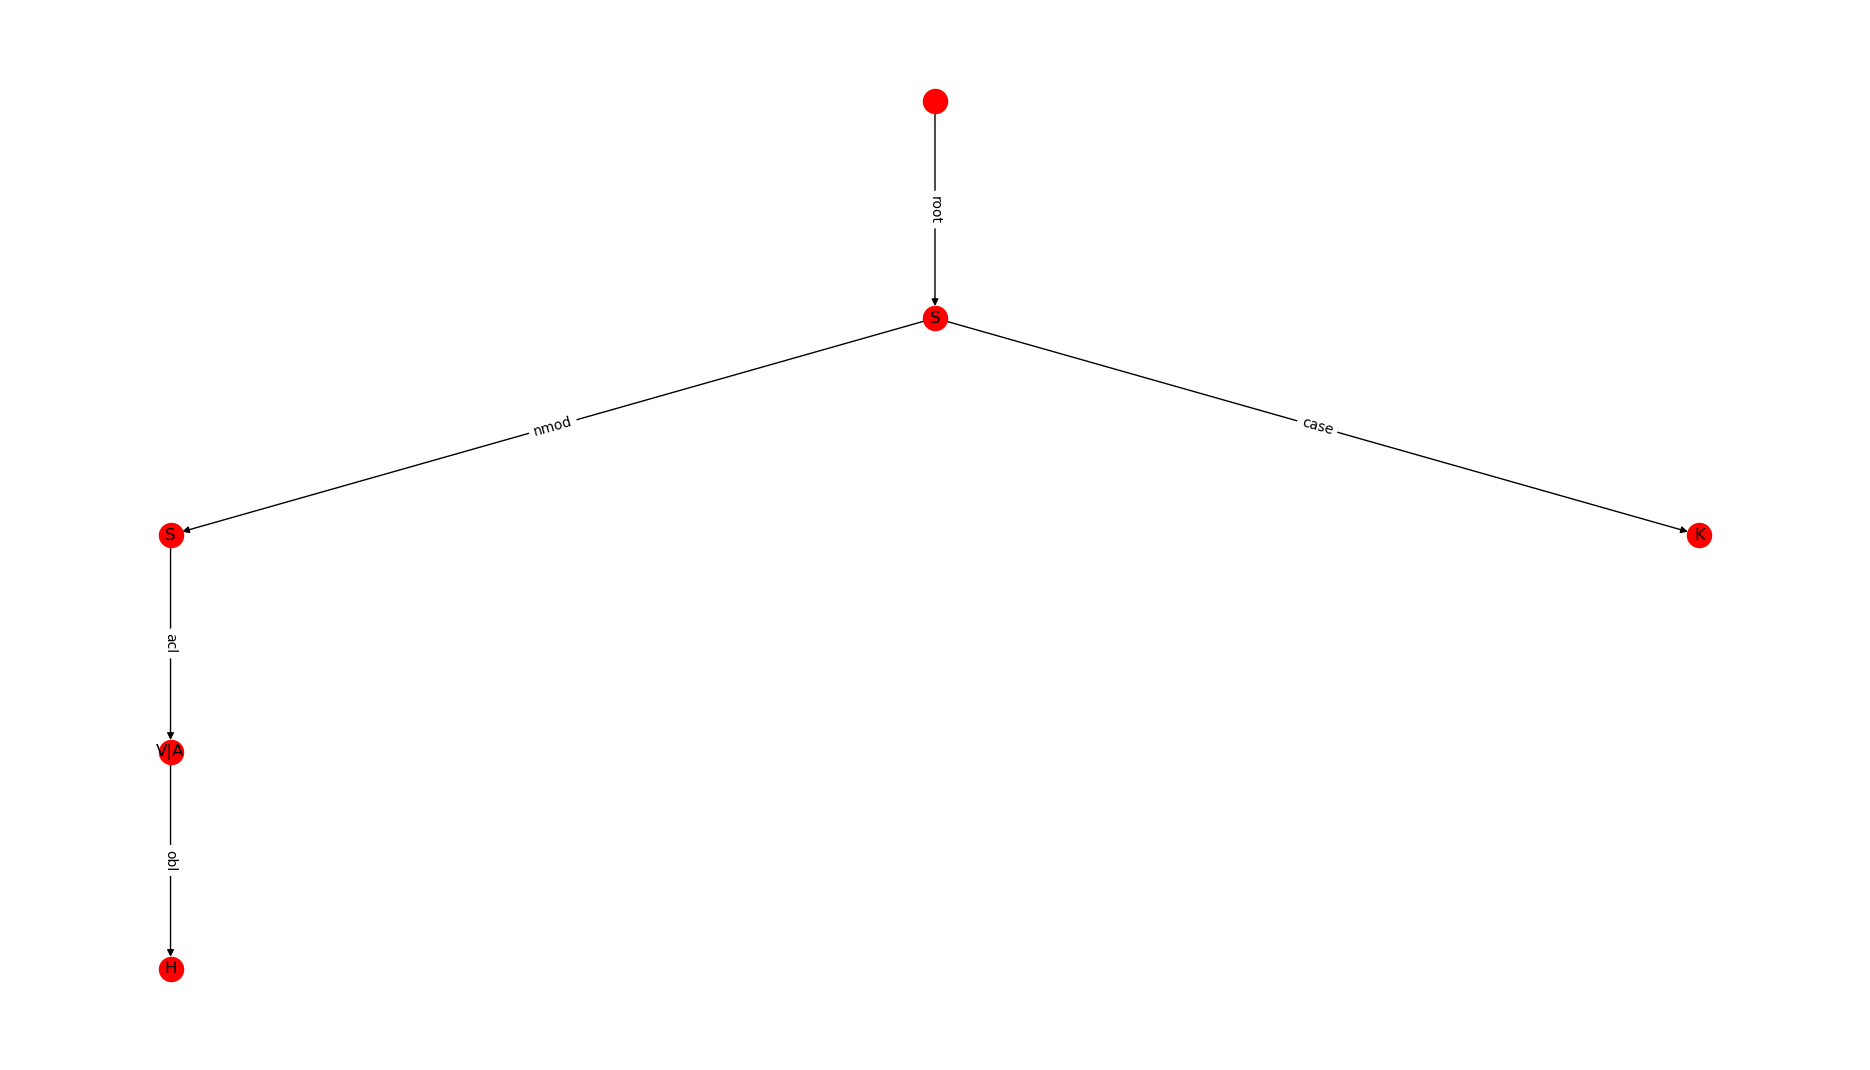

<Figure size 1850x1050 with 0 Axes>

In [21]:
draw_graph(test_graph_with_pos, 'pos')

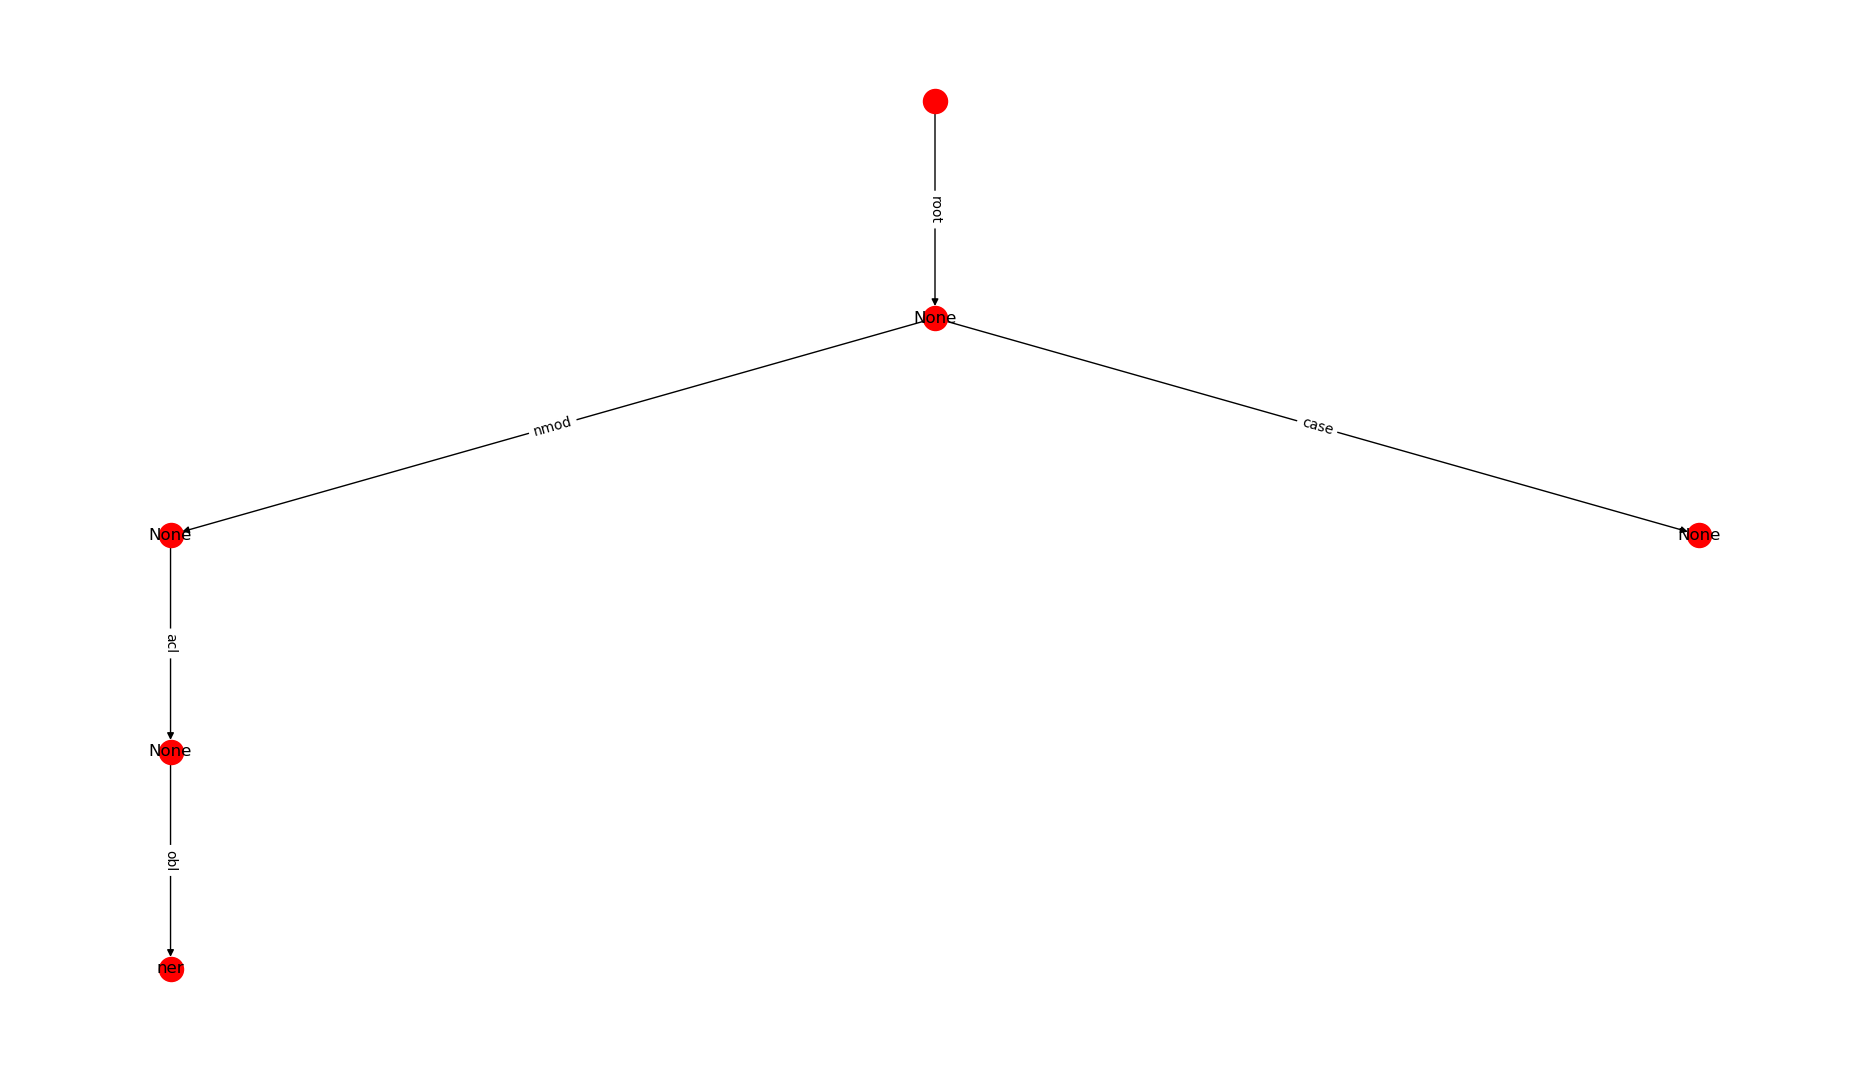

<Figure size 1850x1050 with 0 Axes>

In [23]:
draw_graph(test_graph_with_ner_timex, 'ner_timex')

Graafid ka DataFrame-i:

In [22]:
graphs_all = []
graphs_id = []
graphs_pos = []
graphs_ner_timex = []
for phrase in df['phrase']:
    graph1 = create_graph_with_all_attributes(phrase)
    graph2 = create_graph_with_ids(phrase)
    graph3 = create_graph_with_POS(phrase)
    graph4 = create_graph_with_ner_timex(phrase)
    graphs_all.append(graph1)
    graphs_id.append(graph2)
    graphs_pos.append(graph3)
    graphs_ner_timex.append(graph4)
df.insert(len(df.columns), 'graph_all_attr', graphs_all)
df.insert(len(df.columns), 'graph_id_only', graphs_id)
df.insert(len(df.columns), 'graph_id_pos', graphs_pos)
df.insert(len(df.columns), 'graph_id_ner_timex', graphs_ner_timex)

In [23]:
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph_all_attr,graph_id_only,graph_id_pos,graph_id_ner_timex
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)","(1, 0, 2)","(1, 0, 2)","(1, 0, 2)"
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)","(1, 2, 0)","(1, 2, 0)","(1, 2, 0)"
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)","(1, 0, 2, 3, 4)","(1, 0, 2, 3, 4)","(1, 0, 2, 3, 4)"
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)","(1, 0)","(1, 0)","(1, 0)"
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)","(1, 2, 3, 4, 0, 5)","(1, 2, 3, 4, 0, 5)","(1, 2, 3, 4, 0, 5)"
...,...,...,...,...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)"
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)","(1, 7, 2, 3, 4, 5, 6, 0, 8)","(1, 7, 2, 3, 4, 5, 6, 0, 8)","(1, 7, 2, 3, 4, 5, 6, 0, 8)"
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z,"(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)"
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z,"(1, 6, 2, 3, 4, 5, 0, 7, 8)","(1, 6, 2, 3, 4, 5, 0, 7, 8)","(1, 6, 2, 3, 4, 5, 0, 7, 8)","(1, 6, 2, 3, 4, 5, 0, 7, 8)"


Kas graaf on hashable?

In [24]:
df.duplicated(subset=['graph_all_attr'], keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
835    False
836    False
837    False
838    False
839    False
Length: 840, dtype: bool

Kuna ei tulnud error, siis on hashable.

### DataFrame-i salvestamine

In [32]:
df.to_pickle("./noun_phrase_data.pkl") 

In [76]:
df = pd.read_pickle("./noun_phrase_data.pkl")
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph_all_attr,graph_id_only,graph_id_pos,graph_id_ner_timex
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)","(1, 0, 2)","(1, 0, 2)","(1, 0, 2)"
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)","(1, 2, 0)","(1, 2, 0)","(1, 2, 0)"
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)","(1, 0, 2, 3, 4)","(1, 0, 2, 3, 4)","(1, 0, 2, 3, 4)"
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)","(1, 0)","(1, 0)","(1, 0)"
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)","(1, 2, 3, 4, 0, 5)","(1, 2, 3, 4, 0, 5)","(1, 2, 3, 4, 0, 5)"
...,...,...,...,...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)"
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)","(1, 7, 2, 3, 4, 5, 6, 0, 8)","(1, 7, 2, 3, 4, 5, 6, 0, 8)","(1, 7, 2, 3, 4, 5, 6, 0, 8)"
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z,"(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)"
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z,"(1, 6, 2, 3, 4, 5, 0, 7, 8)","(1, 6, 2, 3, 4, 5, 0, 7, 8)","(1, 6, 2, 3, 4, 5, 0, 7, 8)","(1, 6, 2, 3, 4, 5, 0, 7, 8)"


### Histogramm fraasi pikkuste jagunemisest (sõnades)

In [29]:
# eri fraasitüüpide kohta eraldi histogrammid

In [33]:
all_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df))])

obl_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                               if df['phrase_type'][i]=='obl_phrase'])

nsubj_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='nsubj_phrase'])

nsubj_cop_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                     if df['phrase_type'][i]=='nsubj_cop_phrase'])

obj_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                               if df['phrase_type'][i]=='obj_phrase'])

xcomp_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='xcomp_phrase'])

nmod_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='nmod_phrase'])

appos_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='appos_phrase'])

parataxis_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='parataxis_phrase'])

root_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='root_phrase'])

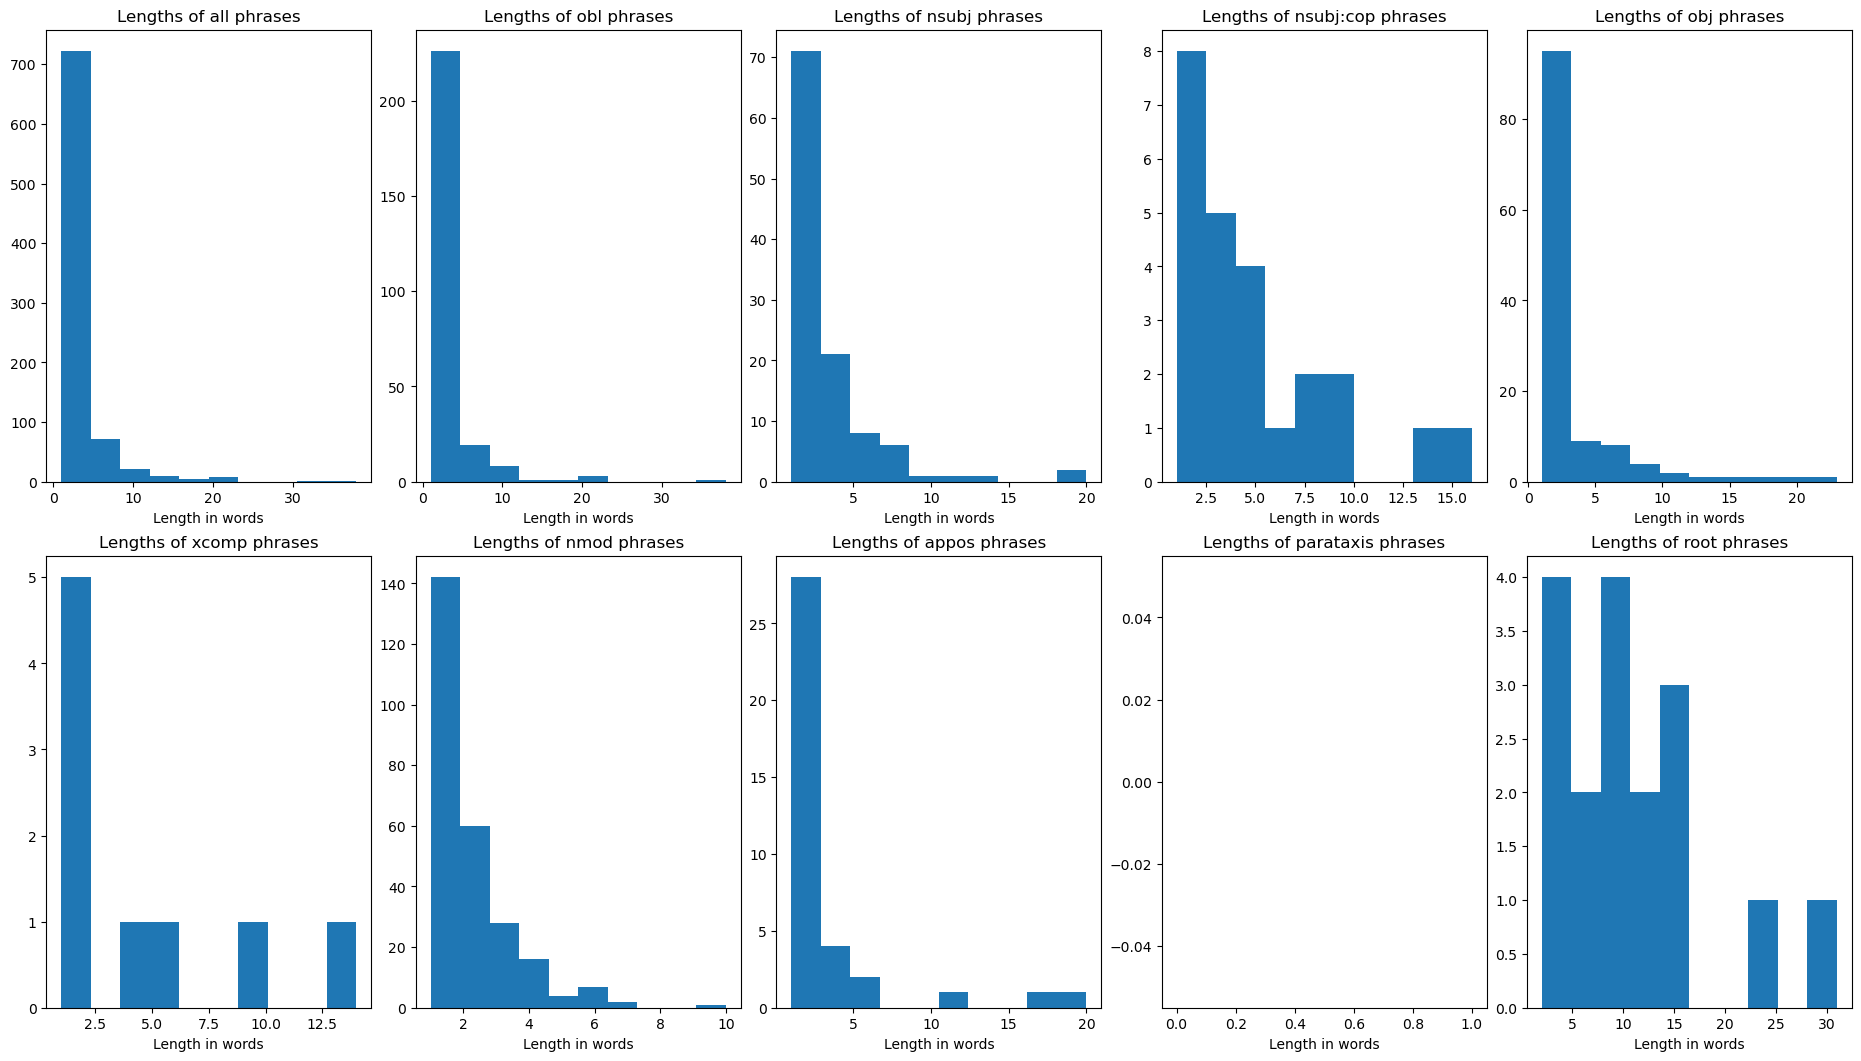

In [45]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, constrained_layout=True)
ax1.set_title('Lengths of all phrases')
ax1.set_xlabel('Length in words')
ax1.hist(all_phrase_lengths)
ax2.set_title('Lengths of obl phrases')
ax2.set_xlabel('Length in words')
ax2.hist(obl_phrase_lengths)
ax3.set_title('Lengths of nsubj phrases')
ax3.set_xlabel('Length in words')
ax3.hist(nsubj_phrase_lengths)
ax4.set_title('Lengths of nsubj:cop phrases')
ax4.set_xlabel('Length in words')
ax4.hist(nsubj_cop_phrase_lengths)
ax5.set_title('Lengths of obj phrases')
ax5.set_xlabel('Length in words')
ax5.hist(obj_phrase_lengths)
ax6.set_title('Lengths of xcomp phrases')
ax6.set_xlabel('Length in words')
ax6.hist(xcomp_phrase_lengths)
ax7.set_title('Lengths of nmod phrases')
ax7.set_xlabel('Length in words')
ax7.hist(nmod_phrase_lengths)
ax8.set_title('Lengths of appos phrases')
ax8.set_xlabel('Length in words')
ax8.hist(appos_phrase_lengths)
ax9.set_title('Lengths of parataxis phrases')
ax9.set_xlabel('Length in words')
ax9.hist(parataxis_phrase_lengths)
ax10.set_title('Lengths of root phrases')
ax10.set_xlabel('Length in words')
ax10.hist(root_phrase_lengths)
plt.show()

### Groupby() graafidel

In [37]:
# katsetamiseks kaks identset ja üks erinev graaf
test_graph = df['graph_id_only'][0]
test_graph2 = df['graph_id_only'][0]
test_graph3 = df['graph_id_only'][2]
test_graph

In [52]:
test_graph4 = df['graph_id_pos'][0]
test_graph5 = df['graph_id_pos'][0]
test_graph6 = df['graph_id_pos'][2]

In [57]:
test_graph7 = df['graph_id_ner_timex'][0]
test_graph8 = df['graph_id_ner_timex'][0]
test_graph9 = df['graph_id_ner_timex'][4]

Tippudes olevate atribuutide väärtused listidena. Tundub, et tuleb ükshaaval küsida.

In [31]:
list(test_graph.nodes(data='id'))

[(1, 1), (0, None), (2, 2)]

In [54]:
print(list(test_graph4.nodes(data='id')))
print(list(test_graph4.nodes(data='pos')))

[(1, 1), (0, None), (2, 2)]
[(1, 'S'), (0, None), (2, 'S')]


In [58]:
print(list(test_graph9.nodes(data='id')))
print(list(test_graph9.nodes(data='ner_timex')))

[(1, 1), (2, 2), (3, 3), (4, 4), (0, None), (5, 5)]
[(1, 'ner'), (2, None), (3, None), (4, None), (0, None), (5, None)]


Pandase groupby() ei saa võrrelda kaht graafi otse. Seetõttu peab valima võrdluse aluseks graafi atribuudid.

In [85]:
# funktsioon tipuatribuutide väärtuste saamiseks
def get_node_data(graph, data):
    # return "-".join([str(node[1]) if node[1] is not None else "0" for node in graph.nodes(data=data)])
    return "-".join([str(node[1]) for node in graph.nodes(data=data)])

Tehakse uued tulbad, kus on graafi eri atribuudijärjestused sõnedena. Nende järgi toimubki hiljem grupeerimine.

In [88]:
df['graph_id_str'] = [get_node_data(graph, 'id') for graph in df['graph_id_only']]

In [92]:
df['graph_pos_str'] = [get_node_data(graph, 'pos') for graph in df['graph_id_pos']]

In [94]:
df['graph_ner_timex_str'] = [get_node_data(graph, 'ner_timex') for graph in df['graph_id_ner_timex']]

In [114]:
df.to_pickle("./noun_phrase_data.pkl") 

In [115]:
df = pd.read_pickle("./noun_phrase_data.pkl")
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph_all_attr,graph_id_only,graph_id_pos,graph_id_ner_timex,graph_id_str,graph_pos_str,graph_ner_timex_str
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)","(1, 0, 2)","(1, 0, 2)","(1, 0, 2)",1-None-2,S-None-S,None-None-None
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)","(1, 2, 0)","(1, 2, 0)","(1, 2, 0)",1-2-None,P-S-None,None-None-None
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)","(1, 0, 2, 3, 4)","(1, 0, 2, 3, 4)","(1, 0, 2, 3, 4)",1-None-2-3-4,S-None-S-S-K,None-None-None-None-None
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)","(1, 0)","(1, 0)","(1, 0)",1-None,H-None,None-None
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)","(1, 2, 3, 4, 0, 5)","(1, 2, 3, 4, 0, 5)","(1, 2, 3, 4, 0, 5)",1-2-3-4-None-5,H-V|A-S-S-None-K,ner-None-None-None-None-None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)",1-None-2-3-4-5-6-7-8-9-10-12-11-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-30-28-29-31,S-None-V-D-S-S-S-S-Y-N-Z-V-Z-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-S-N-Z,None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)","(1, 7, 2, 3, 4, 5, 6, 0, 8)","(1, 7, 2, 3, 4, 5, 6, 0, 8)","(1, 7, 2, 3, 4, 5, 6, 0, 8)",1-7-2-3-4-5-6-None-8,Z-S-P-P-V-H-H-None-Z,None-None-None-None-None-ner-ner-None-None
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z,"(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)",1-None-2-3-4-5-11-6-7-8-9-13-10-12-14,S-None-V-D-S-Z-V|A-Z-A-S-S-V-V-A-Z,None-None-None-None-None-None-None-None-None-None-None-None-None-None-None
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z,"(1, 6, 2, 3, 4, 5, 0, 7, 8)","(1, 6, 2, 3, 4, 5, 0, 7, 8)","(1, 6, 2, 3, 4, 5, 0, 7, 8)","(1, 6, 2, 3, 4, 5, 0, 7, 8)",1-6-2-3-4-5-None-7-8,S-S-V-Y-S-V|A-None-Z-Z,None-None-None-ner-None-None-None-None-None


Grupeerides ainult ID-de alusel:

In [90]:
# grupeerides ainul ID-de alusel
grouped_df2 = df.groupby('graph_id_str')

In [91]:
grouped_df2.describe()
# eri gruppe 116

phrase  \
                                                                  count   
graph_id_str                                                              
1-2-13-3-5-4-6-7-9-8-10-11-12-16-14-15-None-17-19-18-20-21-22-23      1   
1-2-13-3-5-4-6-7-9-8-10-11-12-None                                    1   
1-2-3-11-4-5-6-7-8-9-10-None-12                                       1   
1-2-3-4-5-6-None-7-9-8-10-11-12-13-14-15                              1   
1-2-3-4-5-None                                                        1   
...                                                                 ...   
1-None-2-6-3-4-5-7-11-8-9-10-12-13-16-14-15-17-18-19                  1   
1-None-2-6-3-4-5-7-12-8-9-10-11                                       1   
1-None-2-6-3-4-5-7-8                                                  1   
1-None-2-6-3-4-5-7-8-11-9-10-12                                       1   
1-None-2-7-3-4-5-6                                                    1   

                                                                         \
                                                                 unique   
graph_id_str                                                              
1-2-13-3-5-4-6-7-9-8-10-11-12-16-14-15-None-17-19-18-20-21-22-23      1   
1-2-13-3-5-4-6-7-9-8-10-11-12-None                                    1   
1-2-3-11-4-5-6-7-8-9-10-None-12                                       1   
1-2-3-4-5-6-None-7-9-8-10-11-12-13-14-15                              1   
1-2-3-4-5-None                                                        1   
...                                                                 ...   
1-None-2-6-3-4-5-7-11-8-9-10-12-13-16-14-15-17-18-19                  1   
1-None-2-6-3-4-5-7-12-8-9-10-11                                       1   
1-None-2-6-3-4-5-7-8                                                  1   
1-None-2-6-3-4-5-7-8-11-9-10-12                                       1   
1-None-2-7-3-4-5-6                                                    1   

                                                                                                                                                                                                                             \
                                                                                                                                                                                                                        top   
graph_id_str                                                                                                                                                                                                                  
1-2-13-3-5-4-6-7-9-8-10-11-12-16-14-15-None-17-19-18-20-21-22-23          Text(text='Kursijärgse väärtuse ( 2588560 USD ) ja saadud summa ( 1892500 ) vahe on 696060 dollarit , mis annab vahendustasuks 26,9 protsenti .')   
1-2-13-3-5-4-6-7-9-8-10-11-12-None                                                                                                       Text(text='Kursijärgse väärtuse ( 2588560 USD ) ja saadud summa ( 1892500 ) vahe')   
1-2-3-11-4-5-6-7-8-9-10-None-12                                                                                                Text(text='Konestoni juhatuse esimees Labkovski oli ühtlasi ka NoWe panga juhatuse liige .')   
1-2-3-4-5-6-None-7-9-8-10-11-12-13-14-15                          Text(text='Tallinna Lennujaama riigikantselei plangil vormistatud kirja , milles paluti võimaldada diplomaatilise pagasi transportimine läbi lennujaama')   
1-2-3-4-5-None                                                                                                                                                                Text(text='vähemalt 500 miljoni rubla müügi')   
...                                                                                                                                                                                

Grupeerides ID-de ja POS-järjestuste alusel:

In [96]:
# grupeerides ID-de ja POS-järjestuste alusel
grouped_df3 = df.groupby(['graph_id_str', 'graph_pos_str'])

In [97]:
grouped_df3.describe()
# eri gruppe 256

phrase  \
                                                                                                                       count   
graph_id_str                                                     graph_pos_str                                                 
1-2-13-3-5-4-6-7-9-8-10-11-12-16-14-15-None-17-19-18-20-21-22-23 A-S-S-Z-Y-N-Z-J-S-A|V-Z-N-Z-S-V-N-None-Z-V-P-S-N-S-Z      1   
1-2-13-3-5-4-6-7-9-8-10-11-12-None                               A-S-S-Z-Y-N-Z-J-S-A|V-Z-N-Z-None                          1   
1-2-3-11-4-5-6-7-8-9-10-None-12                                  H-S-S-S-H-V-D-D-Y-S-S-None-Z                              1   
1-2-3-4-5-6-None-7-9-8-10-11-12-13-14-15                         H-S-S-S-V|A-S-None-Z-V-P-V-A-S-S-K-S                      1   
1-2-3-4-5-None                                                   D-N-N-S-S-None                                            1   
...                                                                                                                      ...   
1-None-2-6-3-4-5-7-11-8-9-10-12-13-16-14-15-17-18-19             P-None-Z-V-J-S-V-Z-V-J-S-V-A-J-V-J-S-D-A-S                1   
1-None-2-6-3-4-5-7-12-8-9-10-11                                  P-None-Z-V-P-V-V|A-S-V-A-S-K-S                            1   
1-None-2-6-3-4-5-7-8                                             S-None-Z-V-J-P-K-S-S                                      1   
1-None-2-6-3-4-5-7-8-11-9-10-12                                  S-None-Z-V|A-P-S-V-D-K-S-O-S-Z                            1   
1-None-2-7-3-4-5-6                                               S-None-Z-P-J-S-V-V                                        1   

                                                                                                                              \
                                                                                                                      unique   
graph_id_str                                                     graph_pos_str                                                 
1-2-13-3-5-4-6-7-9-8-10-11-12-16-14-15-None-17-19-18-20-21-22-23 A-S-S-Z-Y-N-Z-J-S-A|V-Z-N-Z-S-V-N-None-Z-V-P-S-N-S-Z      1   
1-2-13-3-5-4-6-7-9-8-10-11-12-None                               A-S-S-Z-Y-N-Z-J-S-A|V-Z-N-Z-None                          1   
1-2-3-11-4-5-6-7-8-9-10-None-12                                  H-S-S-S-H-V-D-D-Y-S-S-None-Z                              1   
1-2-3-4-5-6-None-7-9-8-10-11-12-13-14-15                         H-S-S-S-V|A-S-None-Z-V-P-V-A-S-S-K-S                      1   
1-2-3-4-5-None                                                   D-N-N-S-S-None                                            1   
...                                                                                                                      ...   
1-None-2-6-3-4-5-7-11-8-9-10-12-13-16-14-15-17-18-19             P-None-Z-V-J-S-V-Z-V-J-S-V-A-J-V-J-S-D-A-S                1   
1-None-2-6-3-4-5-7-12-8-9-10-11                                  P-None-Z-V-P-V-V|A-S-V-A-S-K-S                            1   
1-None-2-6-3-4-5-7-8                                             S-None-Z-V-J-P-K-S-S                                      1   
1-None-2-6-3-4-5-7-8-11-9-10-12                                  S-None-Z-V|A-P-S-V-D-K-S-O-S-Z                            1   
1-None-2-7-3-4-5-6                                               S-None-Z-P-J-S-V-V                                        1   

                                                                                                                                                                                                                                                                                  \
                                                                                                                                                                                                                                                                

Grupeerides ID-de ja ner/timex entiteetide alusel:

In [98]:
# grupeerides ID-de ja ner/timex entiteetide alusel
grouped_df4 = df.groupby(['graph_id_str', 'graph_ner_timex_str'])

In [110]:
grouped_df4.describe()
# eri gruppe 145

phrase  \
                                                                                                                                                                                          count   
graph_id_str                                                     graph_ner_timex_str                                                                                                              
1-2-13-3-5-4-6-7-9-8-10-11-12-16-14-15-None-17-19-18-20-21-22-23 None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None      1   
1-2-13-3-5-4-6-7-9-8-10-11-12-None                               None-None-None-None-None-None-None-None-None-None-None-None-None-None                                                        1   
1-2-3-11-4-5-6-7-8-9-10-None-12                                  None-None-None-None-ner-None-None-None-ner-None-None-None-None                                                               1   
1-2-3-4-5-6-None-7-9-8-10-11-12-13-14-15                         ner-ner-None-None-None-None-None-None-None-None-None-None-None-None-None-None                                                1   
1-2-3-4-5-None                                                   None-None-None-None-None-None                                                                                                1   
...                                                                                                                                                                                         ...   
1-None-2-6-3-4-5-7-11-8-9-10-12-13-16-14-15-17-18-19             None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None                          1   
1-None-2-6-3-4-5-7-12-8-9-10-11                                  None-None-None-None-None-None-None-None-None-None-None-None-None                                                             1   
1-None-2-6-3-4-5-7-8                                             None-None-None-None-None-None-None-None-None                                                                                 1   
1-None-2-6-3-4-5-7-8-11-9-10-12                                  None-None-None-None-None-None-None-None-None-None-None-None-None                                                             1   
1-None-2-7-3-4-5-6                                               None-None-None-None-None-None-None-None                                                                                      1   

                                                                                                                                                                                                 \
                                                                                                                                                                                         unique   
graph_id_str                                                     graph_ner_timex_str                                                                                                              
1-2-13-3-5-4-6-7-9-8-10-11-12-16-14-15-None-17-19-18-20-21-22-23 None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None      1   
1-2-13-3-5-4-6-7-9-8-10-11-12-None                               None-None-None-None-None-None-None-None-None-None-None-None-None-None                                                        1   
1-2-3-11-4-5-6-7-8-9-10-None-12                                  None-None-None-None-ner-None-None-None-ner-None-None-None-None                                                               1   
1-2-3-4-5-6-None-7-9-8-10-11-12-13-14-15                         ner-ner-None-None-None-None-None-None-None-None-None-None-None-None-None-None                                                1   
1-2-3-4-5-None                                                   None-None-None-None-None

Üldiselt mida keerukamatel alustel grupeerida, seda rohkem eri gruppe tekib. Erandiks ner/timex entiteetide arvestamine, sest enamikel juhtudel on tegemist None-järjestustega.

Grupid ja nende liikmed:

In [118]:
# grupeeritud ID-de ja ner/timex entiteetide alusel
#for name, group in grouped_df4:
#    display(name, group, len(group))

In [117]:
for name, group in grouped_df4:
    print(name, len(group))
    print()

('1-2-13-3-5-4-6-7-9-8-10-11-12-16-14-15-None-17-19-18-20-21-22-23', 'None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None-None') 1

('1-2-13-3-5-4-6-7-9-8-10-11-12-None', 'None-None-None-None-None-None-None-None-None-None-None-None-None-None') 1

('1-2-3-11-4-5-6-7-8-9-10-None-12', 'None-None-None-None-ner-None-None-None-ner-None-None-None-None') 1

('1-2-3-4-5-6-None-7-9-8-10-11-12-13-14-15', 'ner-ner-None-None-None-None-None-None-None-None-None-None-None-None-None-None') 1

('1-2-3-4-5-None', 'None-None-None-None-None-None') 1

('1-2-3-4-5-None-6-12-7-11-8-9-10', 'None-None-None-None-None-None-None-None-None-None-None-ner-None') 1

('1-2-3-4-6-5-7-None', 'ner-None-None-None-None-None-None-None') 1

('1-2-3-4-None', 'None-None-None-None-None') 11

('1-2-3-4-None', 'ner-ner-None-None-None') 3

('1-2-3-4-None-5', 'ner-None-None-None-None-None') 1

('1-2-3-4-None-5-6', 'None-None-None-None-None-None-None') 1

('1-2-3-4-None-5

### Küsitavad fraasiliigid

Veel oleks võimalik võtta välja järgnevat tüüpi fraasid:
1. Juureks nimisõnaline täiend (nmod). Juhul, kui huvitavad ka mitte verbi otsesed alluvad.
2. Juureks järellisand (appos), enamasti pärisnimed (nt "president Alar Karis" on "president" nsubj, "Alar" appos ja "Karis" flat).
3. Juureks parataxis (niinimetatud kõrvuasendi seos, süntaktilist seost pole), näiteks märgendatakse nii sulgudes olev materjal.
4. Juureks nimisõna (root), näiteks koopulalausetes ("Miisu on ilus noor kass" lausejuureks on "kass").

Esimese ja teise variandi puhul on küsitavus, kas tahetakse mitte verbi otseseid alluvaid. Kolmanda variandi puhul on küsitavus, kas tahetakse ülejäänud lausega mitte süntaktiliselt seotud fraase, samuti tuleks kontrollida sõnaliiki (kas konkreetne parataxis on nimisõna). Neljanda variandi puhul tuleb samuti kontrollida sõnaliiki, kuid küsitavus seisneb selles, kuidas eraldada fraas ülejäänud lausest, sest näiteks koopulalausetes on kõik lauseliikmed nimisõna alluvad, kaasa arvatud olema-verb.
